In [6]:
f = open("../test_data/1117/2021-11-17 1522 run.txt", 'r')


data = []
temp, x, y, z = [], [], [], []

lines = f.readlines()
for line in lines:
    x_index = line.find(' x: ')
    y_index = line.find('y: ')
    z_index = line.find('z: ')
    temp_index = line.find('doppler: ')
    
    if line.startswith('point_id: 0 ') :
        if x != [] :
            data.append([x, y, z])
        temp, x, y, z = [], [], [], []
    if x_index != -1 :
        x.append(float(line[x_index + 3:y_index-1]))
        y.append(float(line[y_index + 3:z_index-1]))
        z.append(float(line[z_index + 3:temp_index-1]))

f.close()

In [7]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib notebook
from ipywidgets import *

<IPython.core.display.Javascript object>


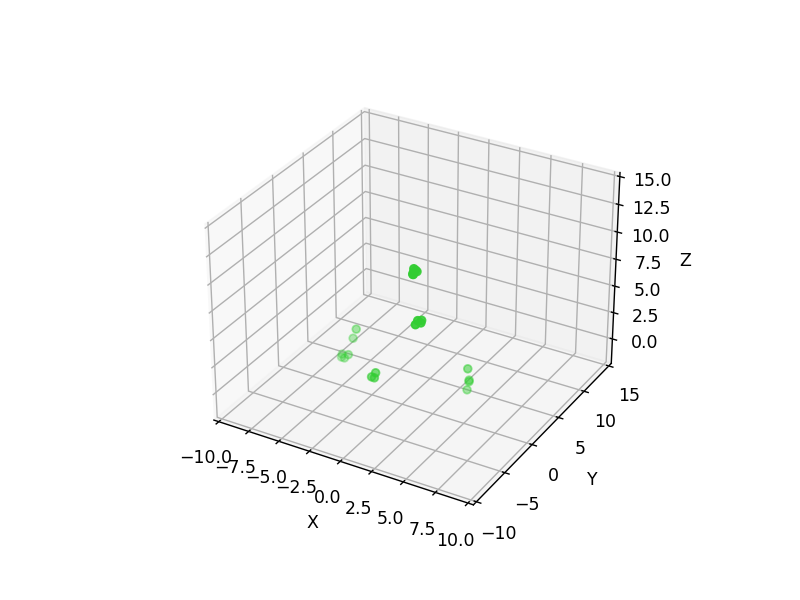

interactive(children=(IntSlider(value=674, description='i', max=2022, min=-674), Output()), _dom_classes=('wid…

<function __main__.update(i=0)>

In [9]:
# create model and prediction
pdData = pd.DataFrame({"x" : data[0][0], "y" : data[0][1], "z" : data[0][2]})

model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(pdData))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([pdData,predict],axis=1)

ax = plt.axes(projection='3d')

def update(i = 0) :
    
    ax = plt.axes(projection='3d')
    ax.view_init(30, 120)
    ax.set_xlim(10, -10)
    ax.set_ylim(15, -10)
    ax.set_zlim(-2, 15)
    ax.scatter3D(data[i][0], data[i][1], data[i][2], c="limegreen")
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
interact(update, i = len(data) // 3)